# 1. Importing Libraries & Loading Data

In [1]:
# public library imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# importing custom decision tree implementation
import DTree

# supressing future warnings and SettingWithCopyWarning warnings
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

# allowing more dataframe columns & rows to be displayed with head() call
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [2]:
# read in dataset
df_train = pd.read_csv('data/DS1.5_training_data.csv')

# label whether flow has occured as 1/0 for classification
df_train['Water Drawn'] = np.where(df_train['Volume of water drawn']>0, 1,0)

# 2. EDA (Exploratory Data Analysis)

In [3]:
df_train.head()

,Measured at,Internal temperature,Outlet temperature,Inlet temperature,Ambient temperature,Energy consumption,Volume of water drawn,Water Drawn
0,2022-11-01 00:03:46+02:00,50.40,32.09,21.76,21.91,0.0,0,0
1,2022-11-01 00:08:49+02:00,50.16,30.79,21.76,21.84,0.0,0,0
2,2022-11-01 00:13:46+02:00,50.06,29.67,21.78,21.86,0.0,0,0
3,2022-11-01 00:18:50+02:00,49.96,28.65,21.80,21.84,0.0,0,0
4,2022-11-01 00:23:47+02:00,49.90,27.88,21.82,21.86,0.0,0,0


#### Problem: as seen by the value counts, we have an unbalanced binary classification problem with only 159 instances of "Water Draws" out of 4,653 instances.

In [4]:
df_train['Water Drawn'].value_counts()

0    4494
1     159
Name: Water Drawn, dtype: int64

In [5]:
df_train.shape

(4653, 8)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Measured at            4653 non-null   object 
 1   Internal temperature   4653 non-null   float64
 2   Outlet temperature     4653 non-null   float64
 3   Inlet temperature      4653 non-null   float64
 4   Ambient temperature    4653 non-null   float64
 5   Energy consumption     4653 non-null   float64
 6   Volume of water drawn  4653 non-null   int64  
 7   Water Drawn            4653 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 290.9+ KB


In [7]:
df_train.describe()

,Internal temperature,Outlet temperature,Inlet temperature,Ambient temperature,Energy consumption,Volume of water drawn,Water Drawn
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,37.065046,25.668145,22.755040,22.749544,11.764490,2.452181,0.034172
std,12.048021,5.278905,0.733729,0.681734,47.757135,19.402182,0.181689
min,22.800000,20.060000,20.560000,20.560000,0.000000,0.000000,0.000000
25%,24.780000,22.480000,22.310000,22.350000,0.000000,0.000000,0.000000
50%,31.970000,23.530000,22.750000,22.800000,0.000000,0.000000,0.000000
75%,49.930000,26.440000,23.170000,23.170000,0.000000,0.000000,0.000000
max,57.720000,46.840000,27.020000,25.930000,265.590000,310.000000,1.000000


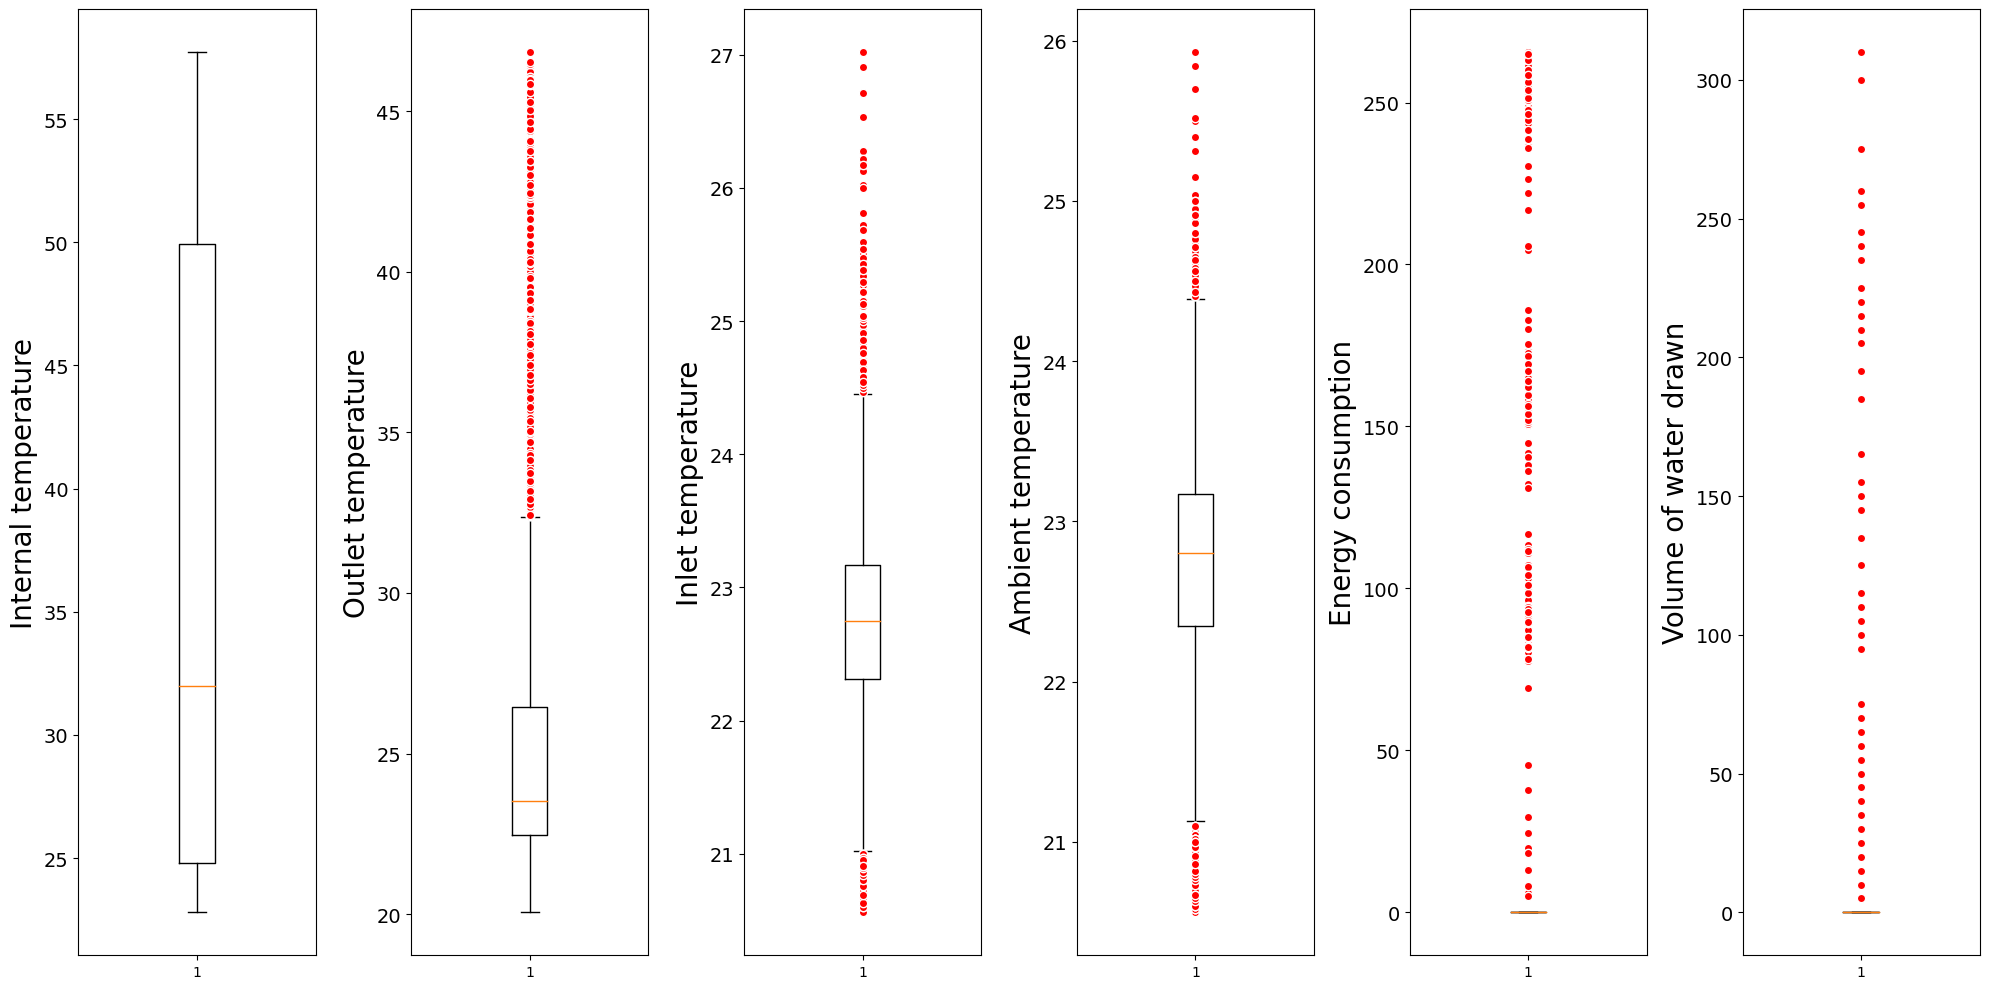

In [8]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_train.iloc[:,1:7].columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_train.iloc[:,i+1], flierprops=red_circle)
    df_train.iloc[:,i+1]
    ax.set_ylabel(df_train.columns[i+1], fontsize=20)
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [10]:
feature = df_train.columns[1]
hist_data = [df_train[df_train['Water Drawn']==1][feature],
             df_train[df_train['Water Drawn']==0][feature]]

group_labels = ['Water Drawn', 'Water Not Drawn']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,show_rug=False)
fig.update_xaxes(title="Internal Tempurature (°C)")
fig.update_yaxes(title="Density")
fig.show()

In [11]:
feature = df_train.columns[2]
hist_data = [df_train[df_train['Water Drawn']==1][feature],
             df_train[df_train['Water Drawn']==0][feature]]

group_labels = ['Water Drawn', 'Water Not Drawn']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,show_rug=False)
fig.update_xaxes(title="Outlet Tempurature (°C)")
fig.update_yaxes(title="Density")
fig.show()

In [13]:
fig = px.scatter(df_train, x='Outlet temperature',y='Volume of water drawn')
fig.show()

In [15]:
feature = df_train.columns[3]
hist_data = [df_train[df_train['Water Drawn']==1][feature],
             df_train[df_train['Water Drawn']==0][feature]]

group_labels = ['Water Drawn', 'Water Not Drawn']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,show_rug=False)
fig.update_xaxes(title="Inlet Tempurature (°C)")
fig.update_yaxes(title="Density")
fig.show()

In [16]:
feature = df_train.columns[4]
hist_data = [df_train[df_train['Water Drawn']==1][feature],
             df_train[df_train['Water Drawn']==0][feature]]

group_labels = ['Water Drawn', 'Water Not Drawn']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,show_rug=False)
fig.update_xaxes(title="Ambient Tempurature (°C)")
fig.update_yaxes(title="Density")
fig.show()

In [17]:
feature = df_train.columns[5]
hist_data = [df_train[df_train['Water Drawn']==1][feature],
             df_train[df_train['Water Drawn']==0][feature]]

group_labels = ['Water Drawn', 'Water Not Drawn']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5,show_rug=False)
fig.update_xaxes(title="Energy Consumption (Watt Hours)")
fig.update_yaxes(title="Density")
fig.show()

# 3. Training & Evaluate Decision Tree Model

I split the data into 3 sets: train, validation, test

In [4]:
X = df_train.iloc[:,1:6]
y = df_train.iloc[:,-1:]
seed = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,
                                                    shuffle=True, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, 
                                                  stratify=y_train, shuffle=True, random_state=seed)

train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)

In [5]:
feature_list = list(df_train.iloc[:,1:6].columns)
label_name = 'Water Drawn'

### a. Tuning Model Using Balanced Accuracy

In [24]:
model = DTree.DecisionTreeClassifier()
params = {'max_depth': [2,3,4],
          'min_samples_split': [10,15,20],
          'min_samples_leaf': [3,5,7]}
param_names = list(params.keys())
best_params = {'max_depth': params[param_names[0]][0],
               'min_samples_split': params[param_names[1]][0],
               'min_samples_leaf': params[param_names[2]][0]}
balanced_acc_best = 0

for i in range(0,3):
    max_depth = params[param_names[0]][i]
    for j in range(0,3):
        min_samples_split = params[param_names[1]][j]
        for k in range(0,3):
            min_samples_leaf = params[param_names[2]][k]
            model.train(df=train, feature_list=feature_list, label_name=label_name,
                        max_depth=max_depth, min_samples_split=min_samples_leaf, 
                        min_samples_leaf=min_samples_leaf)
            balanced_acc_curr = balanced_accuracy_score(y_val.astype('int64'),model.predict(val)['Y_hat'].astype('int64'))
            print("(max_depth = %.0f), (min_samples_split = %.0f), (min_samples_leaf = %.0f)" %
                  (max_depth, min_samples_split, min_samples_leaf))
            print("\tBalanced Accuracy: %.5f" % balanced_acc_curr)
            if balanced_acc_curr > balanced_acc_best:
                balanced_acc_best = balanced_acc_curr
                best_params.update({'max_depth': max_depth,
                                    'min_samples_split': min_samples_split,
                                    'min_samples_leaf': min_samples_leaf})

(max_depth = 2), (min_samples_split = 10), (min_samples_leaf = 3)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 10), (min_samples_leaf = 5)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 10), (min_samples_leaf = 7)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 15), (min_samples_leaf = 3)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 15), (min_samples_leaf = 5)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 15), (min_samples_leaf = 7)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 20), (min_samples_leaf = 3)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 20), (min_samples_leaf = 5)
	Balanced Accuracy: 0.75599
(max_depth = 2), (min_samples_split = 20), (min_samples_leaf = 7)
	Balanced Accuracy: 0.75599
(max_depth = 3), (min_samples_split = 10), (min_samples_leaf = 3)
	Balanced Accuracy: 0.84584
(max_depth = 3), (min_samples_split = 10), (min_samples_leaf

In [27]:
print("Best Parameters:\n",best_params)

Best Parameters:
 {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 3}


In [88]:
model_b = DTree.DecisionTreeClassifier()
model.train(df=train, feature_list=feature_list, label_name=label_name,
                        max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], 
                        min_samples_leaf=best_params['min_samples_split'])
test_acc_b = balanced_accuracy_score(y_test.astype('int64'),model_b.predict(test)['Y_hat'].astype('int64'))
train_acc_b = balanced_accuracy_score(y_train.astype('int64'),model_b.predict(train)['Y_hat'].astype('int64'))
val_acc_b = balanced_accuracy_score(y_val.astype('int64'),model_b.predict(val)['Y_hat'].astype('int64'))
print("Balanced Accuracy:\n\tTraining Set: %.2f%%" % (100*train_acc_b))
print("\tValidation Set: %.2f%%" % (100*val_acc_b))
print("\tTest Set: %.2f%%" % (100*test_acc_b))

Balanced Accuracy:
	Training Set: 83.02%
	Validation Set: 84.58%
	Test Set: 80.66%


In [89]:
print("Tree in DFS Preorder Format:")
model_b.print_tree()

Tree in DFS Preorder Format:
['(root)Outlet temperature>=42.280 (n=2279)', '(leaf)Y=1 (n=43)', '(internal)Outlet temperature>=40.350 (n=2236)', '(internal)Ambient temperature>=23.020 (n=42)', '(leaf)Y=0 (n=19)', '(leaf)Y=1 (n=23)', '(leaf)Y=0 (n=2194)']


### b. Tuning Model Using F1 Score

In [8]:
model = DTree.DecisionTreeClassifier()
params = {'max_depth': [2,3,4],
          'min_samples_split': [10,15,20],
          'min_samples_leaf': [3,5,7]}
param_names = list(params.keys())
best_params = {'max_depth': params[param_names[0]][0],
               'min_samples_split': params[param_names[1]][0],
               'min_samples_leaf': params[param_names[2]][0]}
f1_score_best = 0

for i in range(0,3):
    max_depth = params[param_names[0]][i]
    for j in range(0,3):
        min_samples_split = params[param_names[1]][j]
        for k in range(0,3):
            min_samples_leaf = params[param_names[2]][k]
            model.train(df=train, feature_list=feature_list, label_name=label_name,
                        max_depth=max_depth, min_samples_split=min_samples_leaf, 
                        min_samples_leaf=min_samples_leaf)
            f1_score_curr = f1_score(y_val.astype('int64'),model.predict(val)['Y_hat'].astype('int64'))
            print("(max_depth = %.0f), (min_samples_split = %.0f), (min_samples_leaf = %.0f)" %
                  (max_depth, min_samples_split, min_samples_leaf))
            print("\tF1 Score: %.5f" % f1_score_curr)
            if f1_score_curr > f1_score_best:
                f1_score_best = f1_score_curr
                best_params.update({'max_depth': max_depth,
                                    'min_samples_split': min_samples_split,
                                    'min_samples_leaf': min_samples_leaf})

(max_depth = 2), (min_samples_split = 10), (min_samples_leaf = 3)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 10), (min_samples_leaf = 5)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 10), (min_samples_leaf = 7)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 15), (min_samples_leaf = 3)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 15), (min_samples_leaf = 5)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 15), (min_samples_leaf = 7)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 20), (min_samples_leaf = 3)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 20), (min_samples_leaf = 5)
	F1 Score: 0.64151
(max_depth = 2), (min_samples_split = 20), (min_samples_leaf = 7)
	F1 Score: 0.64151
(max_depth = 3), (min_samples_split = 10), (min_samples_leaf = 3)
	F1 Score: 0.75410
(max_depth = 3), (min_samples_split = 10), (min_samples_leaf = 5)
	F1 Score: 0.75410
(max_depth = 3), (min_samples_split = 10), (min_samples_leaf = 7)

In [9]:
print("Best Parameters:\n",best_params)

Best Parameters:
 {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 3}


In [99]:
model_f1 = DTree.DecisionTreeClassifier()
model.train(df=train, feature_list=feature_list, label_name=label_name,
                        max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], 
                        min_samples_leaf=best_params['min_samples_split'])
test_acc_f1 = f1_score(y_test.astype('int64'),model_f1.predict(test)['Y_hat'].astype('int64'))
train_acc_f1 = f1_score(y_train.astype('int64'),model_f1.predict(train)['Y_hat'].astype('int64'))
val_acc_f1 = f1_score(y_val.astype('int64'),model_f1.predict(val)['Y_hat'].astype('int64'))
print("Balanced Accuracy:\n\tTraining Set: %.2f%%" % (100*train_acc_f1))
print("\tValidation Set: %.2f%%" % (100*val_acc_f1))
print("\tTest Set: %.2f%%" % (100*test_acc_f1))

Balanced Accuracy:
	Training Set: 72.22%
	Validation Set: 75.41%
	Test Set: 63.83%


In [100]:
print("Tree in DFS Preorder Format:")
model_f1.print_tree()

Tree in DFS Preorder Format:
['(root)Outlet temperature>=42.280 (n=2279)', '(leaf)Y=1 (n=43)', '(internal)Outlet temperature>=40.350 (n=2236)', '(internal)Ambient temperature>=23.020 (n=42)', '(leaf)Y=0 (n=19)', '(leaf)Y=1 (n=23)', '(leaf)Y=0 (n=2194)']


### c. Printing Final Model

##### Tree Vizualization (tuned using balanced accuracy metric):

      (Outlet_temperature >= 42.280)
          /                     \
     True/                       \False
        /                         \
    (Y=1)                    (Outlet_temperature >= 40.350)
                                 /                     \
                            True/                       \False
                               /                         \
                  (Ambient_temperature>=23.020)          (Y=0)
                       /                 \
                  True/                   \False
                     /                     \
                  (Y=0)                   (Y=1)

# 4. Apply Model to Test Set

In [3]:
# read in test dataset
df_pred = pd.read_csv('data/DS1.5_test_data.csv')

# visualize dataset
df_pred.head()

,Measured at,Internal temperature,Outlet temperature,Inlet temperature,Ambient temperature,Energy consumption
0,2022-11-17 00:03:45+02:00,23.68,29.41,23.42,23.40,0.0
1,2022-11-17 00:08:46+02:00,23.71,28.63,23.40,23.35,0.0
2,2022-11-17 00:13:47+02:00,23.75,28.00,23.42,23.33,0.0
3,2022-11-17 00:18:48+02:00,23.77,27.43,23.37,23.33,0.0
4,2022-11-17 00:23:50+02:00,23.73,26.93,23.40,23.28,0.0


In [27]:
# make predictions, reformat "Water drawn" column, and save as CSV
preds = model.predict(df_pred.iloc[:,1:])
preds['Water drawn'] = np.where(preds['Y_hat']==1, "True", "False")
pd.concat([df_pred.iloc[:,:1], preds.iloc[:,-1:]], axis=1).to_csv('data/results.csv', index=False)